# Electric V-BAT-like Tail-Sitter (EDF)
0.5 kg payload · early electric demonstrator

This notebook only:
- sets parameters
- runs sizing
- plots results

All physics lives in `src/`.


In [6]:
import sys
from pathlib import Path

# Repo root is one level above /notebooks
REPO_ROOT = Path().resolve().parents[0]
SRC_PATH = REPO_ROOT / "src"

sys.path.insert(0, str(SRC_PATH))

In [7]:
import conceptual_design as cd
print(conceptual_design.__file__)
print(dir(conceptual_design))



C:\dev\vbat-uav-notebooks\src\conceptual_design\__init__.py
['Aerodynamics', 'Battery', 'Environment', 'MassBreakdown', 'Mission', 'Propulsor', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'battery_mass', 'cruise_power', 'dataclass', 'hover_power', 'math', 'models', 'size_vehicle', 'sizing']


In [8]:
import yaml
from pathlib import Path

# Load mission config
mission_path = Path("../config/mission.yaml")

with open(mission_path, "r") as f:
    mission_data = yaml.safe_load(f)

mission_data


{'t_hover': 120.0, 't_cruise': 480.0, 'V_cruise': 20.0, 'reserve_factor': 1.2}

In [9]:
import numpy as np
import matplotlib.pyplot as plt

env = cd.Environment()

mission = cd.Mission(**mission_data)

prop = cd.Propulsor(
    fan_diameter=0.12,
    thrust_to_weight=1.4
)

aero = cd.Aerodynamics(LD=10)

mass = cd.MassBreakdown(payload=0.5)

batt = cd.Battery(specific_energy=200)


In [10]:
res = cd.size_vehicle(env, mission, prop, aero, mass, batt)
res


{'m_total': 2.3400895811129465,
 'm_batt': 0.5400113655101877,
 'P_hover': 1989.069110210014,
 'P_cruise': 76.49479830207092,
 'T_required': 32.12781528686978,
 'E_total': 91.8019321367319,
 'E_pack': 108.00227310203753,
 'history': [(2.5999999999999996,
   0.8,
   0.6281071959941473,
   2329.491716308459,
   84.99096666666665,
   106.77822331900504),
  (2.428107195994147,
   0.6281071959941473,
   0.5693712622481228,
   2102.3398987732426,
   79.37199144532,
   96.79311458218089),
  (2.369371262248123,
   0.5693712622481228,
   0.5497241409578474,
   2026.5196698851773,
   77.4519822964185,
   93.45310396283406),
  (2.3497241409578473,
   0.5497241409578474,
   0.5432011127224657,
   2001.3657657781557,
   76.80974082308093,
   92.34418916281916),
  (2.3432011127224657,
   0.5432011127224657,
   0.5410408611785519,
   1993.0376174477822,
   76.5965106402659,
   91.97694640035382),
  (2.3410408611785516,
   0.5410408611785519,
   0.5403260445670024,
   1990.2821112594045,
   76.5258945

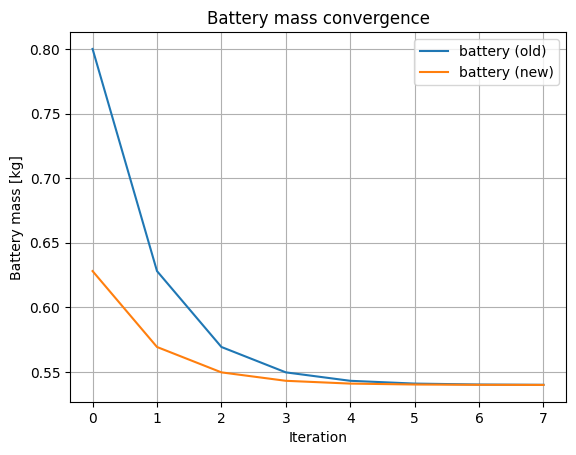

In [15]:
hist = np.array(res["history"])

plt.figure()
plt.plot(hist[:,1], label="battery (old)")
plt.plot(hist[:,2], label="battery (new)")
plt.xlabel("Iteration")
plt.ylabel("Battery mass [kg]")
plt.title("Battery mass convergence")
plt.legend()
plt.grid(True)
plt.show()
